KNN으로 전처리->모델링->평가

메모장이나 편집화면으로 볼 것!

1. 로지스틱 리그레션
train
정확도: 0.8612268080272624
재현율: 0.7125534950071327
정밀도: 0.7516930022573364
F1 점수: 0.7316001464664957
Average Precision: 0.8233739105827503
ROC-AUC Score: 0.922151620659735
test
정확도: 0.858603066439523
재현율: 0.6873661670235546
정밀도: 0.7570754716981132
F1 점수: 0.7205387205387206
Average Precision: 0.826315880600229
ROC-AUC Score: 0.9281265203591605

Important Feature
numTechTickets
Contract_Month-to-month
InternetService_Fiber optic
2. 랜덤포레스트
train
정확도: 0.9596743657705414
재현율: 0.9179743223965763
정밀도: 0.9292418772563177
F1 점수: 0.9235737351991389
Average Precision: 0.9752523780322906
ROC-AUC Score: 0.9915207656220127
test
정확도: 0.8512208972174901
재현율: 0.6488222698072805
정밀도: 0.7556109725685786
F1 점수: 0.6981566820276498
Average Precision: 0.8045045641071308
ROC-AUC Score: 0.9169226110296576

Important Feature
numTechTickets
tenure
TotalCharges

3.디시전 트리
train
정확도: 0.8987126088602801
재현율: 0.7624821683309557
정밀도: 0.8410700236034618
F1 점수: 0.799850355405911
Average Precision: 0.9070518581593674
ROC-AUC Score: 0.9642955755400974
test
정확도: 0.8438387279954571
재현율: 0.6702355460385439
정밀도: 0.7211981566820277
F1 점수: 0.6947835738068813
Average Precision: 0.7058679689890119
ROC-AUC Score: 0.8710636143094963

Important Feature
Contract_Month-to-month
numTechTickets
tenure

4.SVM
train
정확도: 0.857061719045816
재현율: 0.702567760342368
정밀도: 0.7445200302343159
F1 점수: 0.7229357798165138
Average Precision: 0.8156656303234376
ROC-AUC Score: 0.9203777372531141
test
정확도: 0.8642816581487791
재현율: 0.69593147751606
정밀도: 0.7701421800947867
F1 점수: 0.7311586051743532
Average Precision: 0.8301595390922609
ROC-AUC Score: 0.9259587157329663

Important Feature
numTechTickets
tenure
TotalCharges

5. XGboost
train
정확도: 0.8871639530480878
재현율: 0.7553495007132668
정밀도: 0.8071646341463414
F1 점수: 0.7803979366249079
Average Precision: 0.8938230815095652
ROC-AUC Score: 0.9539816094827713
test
정확도: 0.8625780806360023
재현율: 0.6809421841541756
정밀도: 0.7737226277372263
F1 점수: 0.724373576309795
Average Precision: 0.8349934459151099
ROC-AUC Score: 0.9320136753720847

Important Feature
Contract_Month-to-month
InternetService_Fiber optic
OnlineSecurity_No


In [3]:
# csv_path = '../data/processed/Customer_Churn_Dataset_knn.csv' #KNN
# csv_path = '../data/processed/Customer_Churn_Dataset_simple_frequent.csv' #Simple frequent
csv_path = '../data/processed/Customer_Churn_Dataset_simple_median.csv' #Simple median
# csv_path = '../data/processed/Customer_Churn_Dataset_0_impute.csv' # 0 impute

1. 원핫인코딩 후 logistic regression. y는 label-encoding

In [13]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from metrics import print_binary_classification_metrics

df = pd.read_csv(csv_path, index_col=0)

In [ ]:
df2 = df.copy()
df2 = df2.drop(columns='Churn')
numeric_cols = df2.select_dtypes(include=['int64','float64']).columns
categorical_cols = df2.select_dtypes(include=['object']).columns
le = LabelEncoder()
y = le.fit_transform(df['Churn'])
ohe = OneHotEncoder(sparse_output=False)
cate_features = ohe.fit_transform(df2[categorical_cols])
X = np.concatenate(
    [cate_features, df2[numeric_cols].values], 
    axis=1
)
column_names = np.concatenate(
    [ohe.get_feature_names_out(), numeric_cols],
    axis = 0
)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, 
    test_size=0.2,
    stratify=y_train,   # stratify=output(y값, target, label) 지정.
    random_state=42)

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([
    ("scaler", StandardScaler()), 
    ("model", LogisticRegression(random_state=42, C=1)) # predict proba를 하기위해 probability=True가 필요
])

params = {
    "model__C": [0.05, 0.06, 0.07, 0.08, 0.09],
    "model__penalty":['l1', 'l2'],
    'model__solver': ['liblinear', 'saga'],
    'model__max_iter': [100,200,300,400,500]
}
gs = GridSearchCV(
    pipeline,
    params,
    scoring="f1", 
    cv=4,
    n_jobs=-1
)
gs.fit(X_train, y_train)

,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'model__C': [0.05, 0.06, ...], 'model__max_iter': [100, 200, ...], 'model__penalty': ['l1', 'l2'], 'model__solver': ['liblinear', 'saga']}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,4
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [22]:
print(gs.best_score_, gs.best_params_)

0.7298844528577415 {'model__C': 0.07, 'model__max_iter': 100, 'model__penalty': 'l1', 'model__solver': 'saga'}


In [ ]:
# 평가
pred_train = gs.best_estimator_.predict(X_train)
pred_val = gs.best_estimator_.predict(X_val)
pred_test = gs.best_estimator_.predict(X_test)

pred_train_proba = gs.best_estimator_.predict_proba(X_train)
pred_val_proba = gs.best_estimator_.predict_proba(X_val)
pred_test_proba = gs.best_estimator_.predict_proba(X_test)
print("train")
print_binary_classification_metrics(y_train, pred_train, pred_train_proba[:, 1])
print("val")
print_binary_classification_metrics(y_val, pred_val, pred_val_proba[:, 1])
print("test")
print_binary_classification_metrics(y_test, pred_test, pred_test_proba[:, 1])

-1.5207168201917738


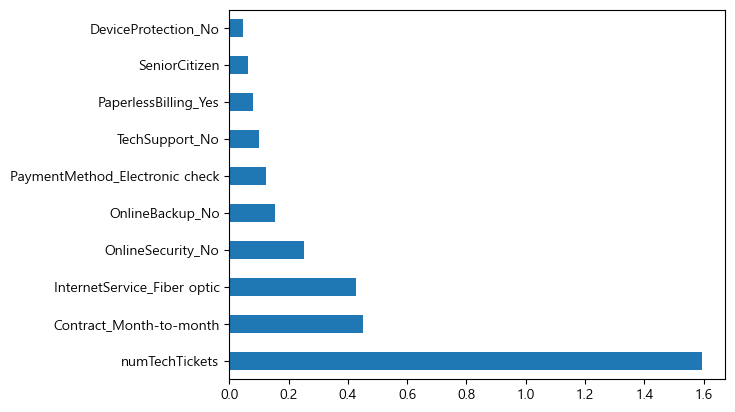

In [124]:
# 회귀 계수 확인
# coefficients = pipeline['model'].coef_[0] # 이진 분류의 경우, 첫 번째 클래스의 계수만 사용
coefficients = gs.best_estimator_['model'].coef_[0] # 이진 분류의 경우, 첫 번째 클래스의 계수만 사용

# 피처 이름과 계수 매핑
coef_series = pd.Series(coefficients, index=column_names)

print(coef_series.loc['tenure'])
# 결과 출력 (계수 값 기준 정렬 등)
coef_series.sort_values(ascending=False)[:10].plot(kind="barh");


Optuna 튜닝

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import optuna
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay, 
                             recall_score, precision_score, f1_score, accuracy_score,
                             PrecisionRecallDisplay, average_precision_score, precision_recall_curve,
                             RocCurveDisplay, roc_auc_score, roc_curve,
                             mean_squared_error, root_mean_squared_error, r2_score)
from metrics import print_binary_classification_metrics
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
df2 = df.copy()
df2 = df2.drop(columns='Churn')
numeric_cols = df2.select_dtypes(include=['int64','float64']).columns
categorical_cols = df2.select_dtypes(include=['object']).columns
le = LabelEncoder()
y = le.fit_transform(df['Churn'])
ohe = OneHotEncoder(sparse_output=False)
cate_features = ohe.fit_transform(df2[categorical_cols])
X = np.concatenate(
    [cate_features, df2[numeric_cols].values], 
    axis=1
)
column_names = np.concatenate(
    [ohe.get_feature_names_out(), numeric_cols],
    axis = 0
)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, 
    test_size=0.2,
    stratify=y_train,   # stratify=output(y값, target, label) 지정.
    random_state=42)

s_scaler = StandardScaler()
X_train_scaled = s_scaler.fit_transform(X_train) # s_scaler를 X_train을 기반으로 학습
X_val_scaled = s_scaler.transform(X_val)
X_test_scaled = s_scaler.transform(X_test)

def objective(trial):
    params = {
        "random_state" : 42,
        "C" : trial.suggest_float("C", 0.01, 0.09),
        "penalty" : trial.suggest_categorical("penalty", ['l1', 'l2']),
        "solver" : trial.suggest_categorical("solver", ['liblinear', 'saga']),
        "max_iter": trial.suggest_int("max_iter", 100, 500)
    }
    
    model = LogisticRegression(**params)
    model.fit(X_train_scaled, y_train)

    preds_test = model.predict(X_test_scaled)
    return f1_score(y_test, preds_test)

study = optuna.create_study(
    direction="maximize",
    study_name="rft_opt"
)

study.optimize(objective, n_trials=100)

print("Best Params:", study.best_params)
print("Best Score:", study.best_value)


[I 2025-11-25 14:57:57,459] A new study created in memory with name: rft_opt
[I 2025-11-25 14:57:57,477] Trial 0 finished with value: 0.7190265486725663 and parameters: {'C': 0.06728474523610661, 'penalty': 'l2', 'solver': 'liblinear', 'max_iter': 166}. Best is trial 0 with value: 0.7190265486725663.
[I 2025-11-25 14:57:57,495] Trial 1 finished with value: 0.7212389380530974 and parameters: {'C': 0.0861657792467656, 'penalty': 'l2', 'solver': 'liblinear', 'max_iter': 425}. Best is trial 1 with value: 0.7212389380530974.
[I 2025-11-25 14:57:57,510] Trial 2 finished with value: 0.7200878155872668 and parameters: {'C': 0.02623803680984435, 'penalty': 'l2', 'solver': 'liblinear', 'max_iter': 392}. Best is trial 1 with value: 0.7212389380530974.
[I 2025-11-25 14:57:57,532] Trial 3 finished with value: 0.7162162162162162 and parameters: {'C': 0.059850449063068814, 'penalty': 'l1', 'solver': 'liblinear', 'max_iter': 445}. Best is trial 1 with value: 0.7212389380530974.
[I 2025-11-25 14:57:57,

Best Params: {'C': 0.0893426359546662, 'penalty': 'l2', 'solver': 'saga', 'max_iter': 488}
Best Score: 0.723404255319149


In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import optuna
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay, 
                             recall_score, precision_score, f1_score, accuracy_score,
                             PrecisionRecallDisplay, average_precision_score, precision_recall_curve,
                             RocCurveDisplay, roc_auc_score, roc_curve,
                             mean_squared_error, root_mean_squared_error, r2_score)
from metrics import print_binary_classification_metrics
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

df = pd.read_csv(csv_path, index_col=0)
df2 = df.copy()
df2 = df2.drop(columns='Churn')
numeric_cols = df2.select_dtypes(include=['int64','float64']).columns
categorical_cols = df2.select_dtypes(include=['object']).columns
le = LabelEncoder()
y = le.fit_transform(df['Churn'])
ohe = OneHotEncoder(sparse_output=False)
cate_features = ohe.fit_transform(df2[categorical_cols])
X = np.concatenate(
    [cate_features, df2[numeric_cols].values], 
    axis=1
)
column_names = np.concatenate(
    [ohe.get_feature_names_out(), numeric_cols],
    axis = 0
)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, 
    test_size=0.2,
    stratify=y_train,   # stratify=output(y값, target, label) 지정.
    random_state=42)

s_scaler = StandardScaler()
X_train_scaled = s_scaler.fit_transform(X_train) # s_scaler를 X_train을 기반으로 학습
X_val_scaled = s_scaler.transform(X_val)
X_test_scaled = s_scaler.transform(X_test)

model = LogisticRegression(C=0.0893426359546662, penalty='l2', solver='saga', max_iter=488, random_state=42)
model.fit(X_train_scaled, y_train)

# 평가
pred_train = model.predict(X_train_scaled)
pred_val = model.predict(X_val_scaled)
pred_test = model.predict(X_test_scaled)

pred_train_proba = model.predict_proba(X_train_scaled)
pred_val_proba = model.predict_proba(X_val_scaled)
pred_test_proba = model.predict_proba(X_test_scaled)
print("train")
print_binary_classification_metrics(y_train, pred_train, pred_train_proba[:, 1])
print("val")
print_binary_classification_metrics(y_val, pred_val, pred_val_proba[:, 1])
print("test")
print_binary_classification_metrics(y_test, pred_test, pred_test_proba[:, 1])


train
정확도: 0.8615384615384616
F1 점수: 0.7305389221556886
재현율: 0.7074041034790366
정밀도: 0.7552380952380953
Average Precision: 0.818479775040327
ROC-AUC Score: 0.9204113192841444
val
정확도: 0.8618732261116367
F1 점수: 0.7364620938628159
재현율: 0.7259786476868327
정밀도: 0.7472527472527473
Average Precision: 0.8349649834642341
ROC-AUC Score: 0.9263583666581062
test
정확도: 0.8597387847813742
F1 점수: 0.723404255319149
재현율: 0.6916488222698073
정밀도: 0.7582159624413145
Average Precision: 0.8250824713887608
ROC-AUC Score: 0.9280272315976554


-1.1487804401700143


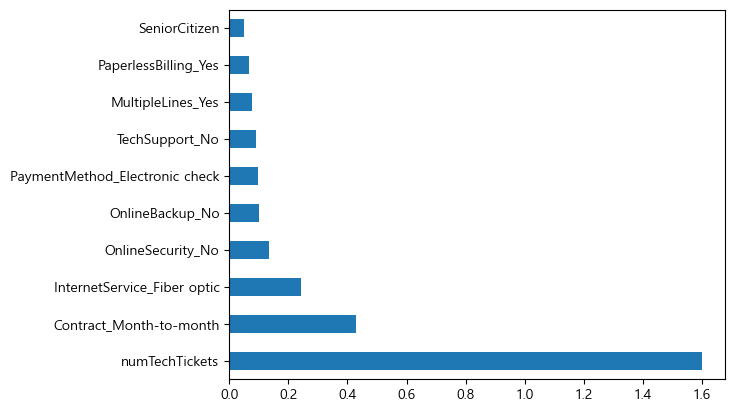

In [17]:
# 회귀 계수 확인
# coefficients = pipeline['model'].coef_[0] # 이진 분류의 경우, 첫 번째 클래스의 계수만 사용
coefficients = model.coef_[0] # 이진 분류의 경우, 첫 번째 클래스의 계수만 사용

# 피처 이름과 계수 매핑
coef_series = pd.Series(coefficients, index=column_names)

print(coef_series.loc['tenure'])
# 결과 출력 (계수 값 기준 정렬 등)
coef_series.sort_values(ascending=False)[:10].plot(kind="barh");


이 위까지 one-hot encoding 후 linear regression

2. Randomforest

In [131]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from metrics import print_binary_classification_metrics

df = pd.read_csv(csv_path, index_col=0)

In [ ]:
df2 = df.copy()
df2 = df2.drop(columns='Churn')
numeric_cols = df2.select_dtypes(include=['int64','float64']).columns
categorical_cols = df2.select_dtypes(include=['object']).columns
le = LabelEncoder()
y = le.fit_transform(df['Churn'])
ohe = OneHotEncoder(sparse_output=False)
cate_features = ohe.fit_transform(df2[categorical_cols])
X = np.concatenate(
    [cate_features, df2[numeric_cols].values], 
    axis=1
)
randomforest_feature_name = np.concatenate(
    [ohe.get_feature_names_out(), numeric_cols],
    axis = 0
)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, 
    test_size=0.2,
    stratify=y_train,   # stratify=output(y값, target, label) 지정.
    random_state=42)

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    ("model", RandomForestClassifier(max_depth=16, random_state=42) )
])

params = {
    "model__max_depth": [11, 12, 13],
    "model__n_estimators": [90, 100, 110],
    "model__min_samples_split": [2, 5, 10],
    "model__min_samples_leaf": [1, 3, 5]
}
gs = GridSearchCV(
    pipeline,
    params,
    scoring="f1", 
    cv=4,
    n_jobs=-1
)
gs.fit(X_train, y_train)

,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'model__max_depth': [11, 12, ...], 'model__min_samples_leaf': [1, 3, ...], 'model__min_samples_split': [2, 5, ...], 'model__n_estimators': [90, 100, ...]}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,4
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,110


In [128]:
print(gs.best_score_)
print(gs.best_params_)

0.7098325747140926
{'model__max_depth': 12, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 100}


In [60]:
# 평가
pred_train = gs.best_estimator_.predict(X_train)
pred_test = gs.best_estimator_.predict(X_test)

pred_train_proba = gs.best_estimator_.predict_proba(X_train)
pred_test_proba = gs.best_estimator_.predict_proba(X_test)
print("train")
print_binary_classification_metrics(y_train, pred_train, pred_train_proba[:, 1])
print("test")
print_binary_classification_metrics(y_test, pred_test, pred_test_proba[:, 1])

train
정확도: 0.9594850435441121
F1 점수: 0.9234073013600572
재현율: 0.920114122681883
정밀도: 0.9267241379310345
Average Precision: 0.975077965995266
ROC-AUC Score: 0.9915707678279924
test
정확도: 0.8534923339011925
F1 점수: 0.7013888888888888
재현율: 0.6488222698072805
정밀도: 0.7632241813602015
Average Precision: 0.8031737935889766
ROC-AUC Score: 0.9165709633326604


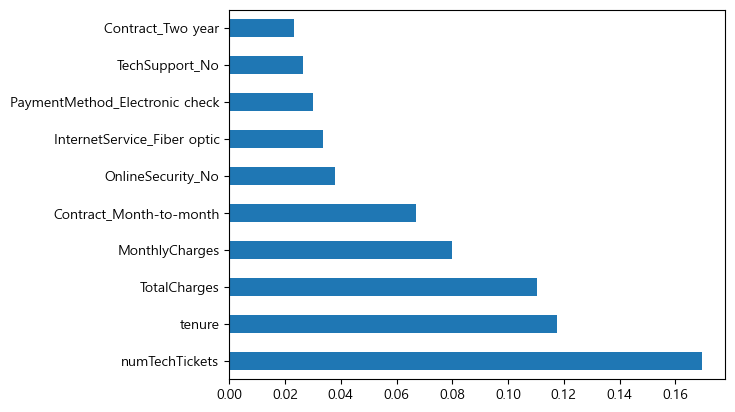

In [131]:
randomforest_feature_name[:-1]
best_model = gs.best_estimator_
fi = pd.Series(best_model['model'].feature_importances_, index=randomforest_feature_name).sort_values(ascending=False)
fi.sort_values(ascending=False)[:10].plot(kind="barh");


Optuna 튜닝

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import optuna
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay, 
                             recall_score, precision_score, f1_score, accuracy_score,
                             PrecisionRecallDisplay, average_precision_score, precision_recall_curve,
                             RocCurveDisplay, roc_auc_score, roc_curve,
                             mean_squared_error, root_mean_squared_error, r2_score,
                             print_binary_classification_metrics)
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

df = pd.read_csv(csv_path, index_col=0)
df2 = df.copy()
df2 = df2.drop(columns='Churn')
numeric_cols = df2.select_dtypes(include=['int64','float64']).columns
categorical_cols = df2.select_dtypes(include=['object']).columns
le = LabelEncoder()
y = le.fit_transform(df['Churn'])
ohe = OneHotEncoder(sparse_output=False)
cate_features = ohe.fit_transform(df2[categorical_cols])
X = np.concatenate(
    [cate_features, df2[numeric_cols].values], 
    axis=1
)
randomforest_feature_name = np.concatenate(
    [ohe.get_feature_names_out(), numeric_cols],
    axis = 0
)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, 
    test_size=0.2,
    stratify=y_train,   # stratify=output(y값, target, label) 지정.
    random_state=42)

def objective(trial):
    params = {
        "random_state" : 42,
        "n_estimators" : trial.suggest_int("n_estimators", 100, 1000),
        "max_depth" : trial.suggest_int("max_depth", 2, 30),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 8),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 2, 8)
    }
    
    model = RandomForestClassifier(**params)
    model.fit(X_train, y_train)

    preds_test = model.predict(X_test)
    return f1_score(y_test, preds_test)

study = optuna.create_study(
    direction="maximize",
    study_name="rft_opt"
)

study.optimize(objective, n_trials=100)

print("Best Params:", study.best_params)
print("Best Score:", study.best_value)

[I 2025-11-25 14:27:26,798] A new study created in memory with name: rft_opt
[I 2025-11-25 14:27:27,296] Trial 0 finished with value: 0.680047225501771 and parameters: {'n_estimators': 197, 'max_depth': 11, 'min_samples_split': 4, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.680047225501771.
[I 2025-11-25 14:27:28,015] Trial 1 finished with value: 0.08213552361396304 and parameters: {'n_estimators': 589, 'max_depth': 2, 'min_samples_split': 4, 'min_samples_leaf': 8}. Best is trial 0 with value: 0.680047225501771.
[I 2025-11-25 14:27:30,490] Trial 2 finished with value: 0.6753554502369669 and parameters: {'n_estimators': 898, 'max_depth': 17, 'min_samples_split': 5, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.680047225501771.
[I 2025-11-25 14:27:32,733] Trial 3 finished with value: 0.6870588235294117 and parameters: {'n_estimators': 766, 'max_depth': 16, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 3 with value: 0.6870588235294117.
[I 2025-11-25 14:27

Best Params: {'n_estimators': 604, 'max_depth': 12, 'min_samples_split': 4, 'min_samples_leaf': 2}
Best Score: 0.6993006993006993


In [ ]:
from sklearn.ensemble import RandomForestClassifier
import optuna
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay, 
                             recall_score, precision_score, f1_score, accuracy_score,
                             PrecisionRecallDisplay, average_precision_score, precision_recall_curve,
                             RocCurveDisplay, roc_auc_score, roc_curve,
                             mean_squared_error, root_mean_squared_error, r2_score)

model = RandomForestClassifier(max_depth=12, n_estimators=604, min_samples_leaf=2, min_samples_split=4,random_state=42)
model.fit(X_train, y_train)

# 평가
pred_train = model.predict(X_train)
pred_val = model.predict(X_val)
pred_test = model.predict(X_test)

pred_train_proba = model.predict_proba(X_train)
pred_val_proba = model.predict_proba(X_val)
pred_test_proba = model.predict_proba(X_test)
print("train")
print_binary_classification_metrics(y_train, pred_train, pred_train_proba[:, 1])
print("val")
print_binary_classification_metrics(y_val, pred_val, pred_val_proba[:, 1])
print("test")
print_binary_classification_metrics(y_test, pred_test, pred_test_proba[:, 1])

train
정확도: 0.9363313609467455
F1 점수: 0.8760939659143252
재현율: 0.848349687778769
정밀도: 0.9057142857142857
Average Precision: 0.9544836055209339
ROC-AUC Score: 0.9834562120069527
val
정확도: 0.8552507095553453
F1 점수: 0.7182320441988951
재현율: 0.693950177935943
정밀도: 0.7442748091603053
Average Precision: 0.8158260741034379
ROC-AUC Score: 0.9242167149723007
test
정확도: 0.8534923339011925
F1 점수: 0.6993006993006993
재현율: 0.6423982869379015
정밀도: 0.7672634271099744
Average Precision: 0.8003978500575571
ROC-AUC Score: 0.9224389291376109


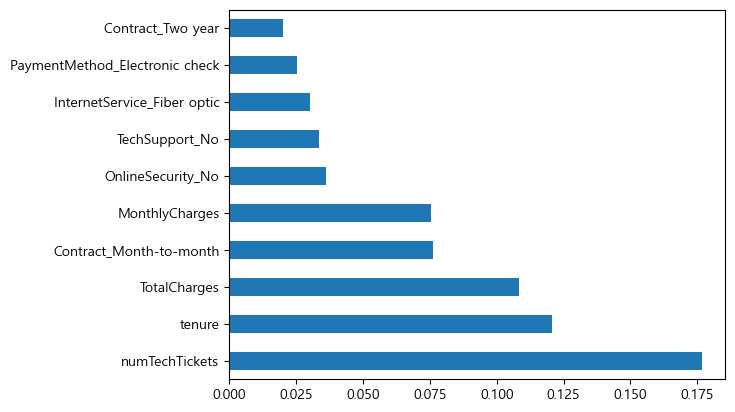

In [137]:
fi = pd.Series(model.feature_importances_, index=randomforest_feature_name).sort_values(ascending=False)
fi.sort_values(ascending=False)[:10].plot(kind="barh");


여기까지 원핫인코딩 후 randomforest. y는 label

3. decision tree

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from metrics import print_binary_classification_metrics

df = pd.read_csv(csv_path, index_col=0)
df2 = df.copy()
df2 = df2.drop(columns='Churn')
numeric_cols = df2.select_dtypes(include=['int64','float64']).columns
categorical_cols = df2.select_dtypes(include=['object']).columns
le = LabelEncoder()
y = le.fit_transform(df['Churn'])
ohe = OneHotEncoder(sparse_output=False)
cate_features = ohe.fit_transform(df2[categorical_cols])
X = np.concatenate(
    [cate_features, df2[numeric_cols].values], 
    axis=1
)
decision_feature_name = np.concatenate(
    [ohe.get_feature_names_out(), numeric_cols],
    axis = 0
)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, 
    test_size=0.2,
    stratify=y_train,   # stratify=output(y값, target, label) 지정.
    random_state=42)

In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

pipeline = Pipeline([
    ("model", DecisionTreeClassifier(max_depth=8, random_state=42) )
])

params = {
    "model__max_depth": [13, 14, 15],
    "model__min_samples_split": [2, 3],
    "model__min_samples_leaf": [4, 7, 8, 9]
}
gs = GridSearchCV(
    pipeline,
    params,
    scoring="f1", 
    cv=4,
    n_jobs=-1
)
gs.fit(X_train, y_train)

,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'model__max_depth': [13, 14, ...], 'model__min_samples_leaf': [4, 7, ...], 'model__min_samples_split': [2, 3]}"
,scoring,'f1'
,n_jobs,-1
,refit,True
,cv,4
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [135]:
print(gs.best_score_)
print(gs.best_params_)

0.6844173986793992
{'model__max_depth': 14, 'model__min_samples_leaf': 9, 'model__min_samples_split': 2}


In [ ]:
# 평가
pred_train = gs.best_estimator_.predict(X_train)
pred_val = gs.best_estimator_.predict(X_val)
pred_test = gs.best_estimator_.predict(X_test)

pred_train_proba = gs.best_estimator_.predict_proba(X_train)
pred_val_proba = gs.best_estimator_.predict_proba(X_val)
pred_test_proba = gs.best_estimator_.predict_proba(X_test)
from metrics import print_binary_classification_metrics
print("train")
print_binary_classification_metrics(y_train, pred_train, pred_train_proba[:, 1])
print("val")
print_binary_classification_metrics(y_val, pred_val, pred_val_proba[:, 1])
print("test")
print_binary_classification_metrics(y_test, pred_test, pred_test_proba[:, 1])

train
정확도: 0.89568345323741
F1 점수: 0.7932457786116323
재현율: 0.753922967189729
정밀도: 0.8368962787015044
Average Precision: 0.902979719021328
ROC-AUC Score: 0.9622339037016339
test
정확도: 0.8364565587734242
F1 점수: 0.6756756756756757
재현율: 0.6423982869379015
정밀도: 0.7125890736342043
Average Precision: 0.7173425075134765
ROC-AUC Score: 0.8779277773548813


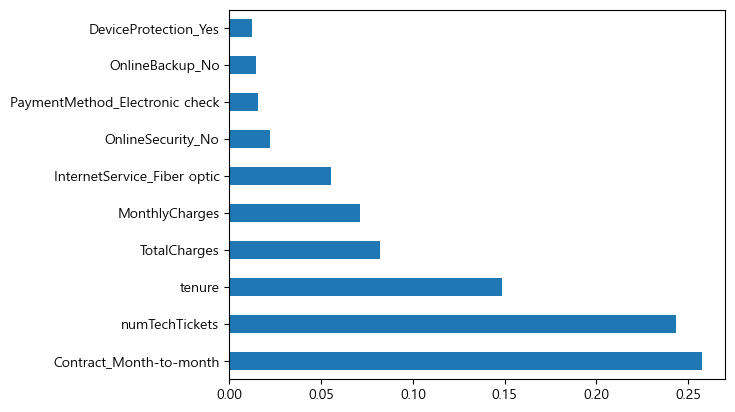

In [ ]:
decision_feature_name[:-1]
best_model = gs.best_estimator_
fi = pd.Series(best_model['model'].feature_importances_, index=decision_feature_name).sort_values(ascending=False)
fi.sort_values(ascending=False)[:10].plot(kind="barh");

Optuna

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import optuna
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay, 
                             recall_score, precision_score, f1_score, accuracy_score,
                             PrecisionRecallDisplay, average_precision_score, precision_recall_curve,
                             RocCurveDisplay, roc_auc_score, roc_curve,
                             mean_squared_error, root_mean_squared_error, r2_score,
                             print_binary_classification_metrics)
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

df = pd.read_csv(csv_path, index_col=0)
df2 = df.copy()
df2 = df2.drop(columns='Churn')
numeric_cols = df2.select_dtypes(include=['int64','float64']).columns
categorical_cols = df2.select_dtypes(include=['object']).columns
le = LabelEncoder()
y = le.fit_transform(df['Churn'])
ohe = OneHotEncoder(sparse_output=False)
cate_features = ohe.fit_transform(df2[categorical_cols])
X = np.concatenate(
    [cate_features, df2[numeric_cols].values], 
    axis=1
)
decision_feature_name = np.concatenate(
    [ohe.get_feature_names_out(), numeric_cols],
    axis = 0
)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, 
    test_size=0.2,
    stratify=y_train,   # stratify=output(y값, target, label) 지정.
    random_state=42)

def objective(trial):
    params = {
        "random_state" : 42,
        "max_depth" : trial.suggest_int("max_depth", 2, 30),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 8),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 2, 8)
    }
    
    model = DecisionTreeClassifier(**params)
    model.fit(X_train, y_train)

    preds_test = model.predict(X_test)
    return f1_score(y_test, preds_test)

study = optuna.create_study(
    direction="maximize",
    study_name="svm_opt"
)

study.optimize(objective, n_trials=100)

print("Best Params:", study.best_params)
print("Best Score:", study.best_value)

[I 2025-11-25 14:33:43,872] A new study created in memory with name: svm_opt
[I 2025-11-25 14:33:43,883] Trial 0 finished with value: 0.6941066417212348 and parameters: {'max_depth': 3, 'min_samples_split': 7, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.6941066417212348.
[I 2025-11-25 14:33:43,901] Trial 1 finished with value: 0.7011866235167206 and parameters: {'max_depth': 18, 'min_samples_split': 2, 'min_samples_leaf': 5}. Best is trial 1 with value: 0.7011866235167206.
[I 2025-11-25 14:33:43,920] Trial 2 finished with value: 0.6742081447963801 and parameters: {'max_depth': 29, 'min_samples_split': 6, 'min_samples_leaf': 8}. Best is trial 1 with value: 0.7011866235167206.
[I 2025-11-25 14:33:43,939] Trial 3 finished with value: 0.6568516421291053 and parameters: {'max_depth': 28, 'min_samples_split': 5, 'min_samples_leaf': 4}. Best is trial 1 with value: 0.7011866235167206.
[I 2025-11-25 14:33:43,957] Trial 4 finished with value: 0.6795016987542469 and parameters: {'max_de

Best Params: {'max_depth': 6, 'min_samples_split': 6, 'min_samples_leaf': 5}
Best Score: 0.7233115468409586


In [141]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# pipeline = Pipeline([
#     ("model", DecisionTreeClassifier(max_depth=8, random_state=42) )
# ])

from sklearn.tree import DecisionTreeClassifier
import optuna
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay, 
                             recall_score, precision_score, f1_score, accuracy_score,
                             PrecisionRecallDisplay, average_precision_score, precision_recall_curve,
                             RocCurveDisplay, roc_auc_score, roc_curve,
                             mean_squared_error, root_mean_squared_error, r2_score)
model = DecisionTreeClassifier(max_depth=6, min_samples_split=6, min_samples_leaf=5, random_state=42)
model.fit(X_train, y_train)

# 평가
pred_train = model.predict(X_train)
pred_val = model.predict(X_val)
pred_test = model.predict(X_test)

pred_train_proba = model.predict_proba(X_train)
pred_val_proba = model.predict_proba(X_val)
pred_test_proba = model.predict_proba(X_test)
from metrics import print_binary_classification_metrics
print("train")
print_binary_classification_metrics(y_train, pred_train, pred_train_proba[:, 1])
print("val")
print_binary_classification_metrics(y_val, pred_val, pred_val_proba[:, 1])
print("test")
print_binary_classification_metrics(y_test, pred_test, pred_test_proba[:, 1])

train
정확도: 0.8636686390532544
F1 점수: 0.7391304347826086
재현율: 0.727921498661909
정밀도: 0.7506899724011039
Average Precision: 0.8220678207898291
ROC-AUC Score: 0.9308025039774869
val
정확도: 0.8609271523178808
F1 점수: 0.7416520210896309
재현율: 0.7508896797153025
정밀도: 0.7326388888888888
Average Precision: 0.7839877876437856
ROC-AUC Score: 0.918266408628976
test
정확도: 0.855763770584895
F1 점수: 0.7233115468409586
재현율: 0.7109207708779444
정밀도: 0.7361419068736141
Average Precision: 0.785286341890783
ROC-AUC Score: 0.9108552402953509


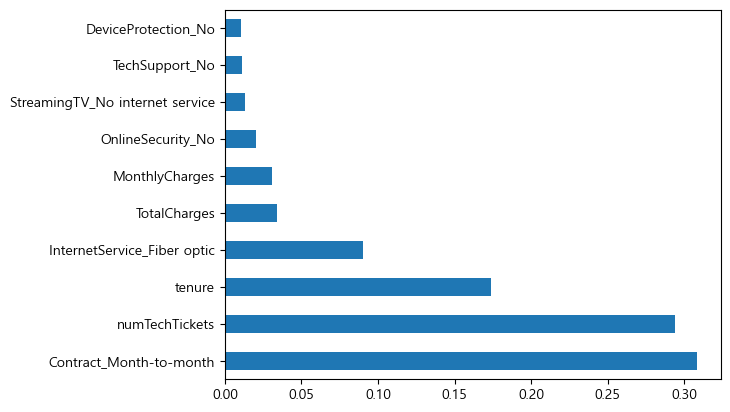

In [142]:
fi = pd.Series(model.feature_importances_, index=decision_feature_name).sort_values(ascending=False)
fi.sort_values(ascending=False)[:10].plot(kind="barh");

4. SVM

In [106]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
df = pd.read_csv(csv_path, index_col=0)

In [107]:
df2 = df.copy()
df2 = df2.drop(columns='Churn')
numeric_cols = df2.select_dtypes(include=['int64','float64']).columns
categorical_cols = df2.select_dtypes(include=['object']).columns
le = LabelEncoder()
y = le.fit_transform(df['Churn'])
ohe = OneHotEncoder(sparse_output=False)
cate_features = ohe.fit_transform(df2[categorical_cols])
X = np.concatenate(
    [cate_features, df2[numeric_cols].values], 
    axis=1
)
feature_names = np.concatenate(
    [ohe.get_feature_names_out(), numeric_cols],
    axis = 0
)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, 
    test_size=0.2,
    stratify=y_train,   # stratify=output(y값, target, label) 지정.
    random_state=42)

In [108]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# SVM : Feature scaling/One Hot Encoding 전처리.
pipeline = Pipeline([
    ("scaler", StandardScaler()), 
    ("svm", SVC(random_state=0, probability=True)) # predict proba를 하기위해 probability=True가 필요
])

params = {
    "svm__kernel": ["linear", "rbf",  "poly", "sigmoid"],
    "svm__C": [1.2, 1.3, 1.4], 
    "svm__gamma": [0.01, 0.02], 
}

gs = GridSearchCV(
    pipeline, 
    params,
    scoring=["f1", "recall"], 
    refit="f1",
    cv=4,
    n_jobs=-1
)
gs.fit(X_train, y_train)

,estimator,Pipeline(step...om_state=0))])
,param_grid,"{'svm__C': [1.2, 1.3, ...], 'svm__gamma': [0.01, 0.02], 'svm__kernel': ['linear', 'rbf', ...]}"
,scoring,"['f1', 'recall']"
,n_jobs,-1
,refit,'f1'
,cv,4
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [6]:
print(gs.best_score_, gs.best_params_)

0.7219471296661344 {'svm__C': 1.3, 'svm__gamma': 0.01, 'svm__kernel': 'linear'}


In [109]:
# 평가
pred_train = gs.best_estimator_.predict(X_train)
pred_val = gs.best_estimator_.predict(X_val)
pred_test = gs.best_estimator_.predict(X_test)

pred_train_proba = gs.best_estimator_.predict_proba(X_train)
pred_val_proba = gs.best_estimator_.predict_proba(X_val)
pred_test_proba = gs.best_estimator_.predict_proba(X_test)
print("train")
print_binary_classification_metrics(y_train, pred_train, pred_train_proba[:, 1])
print("valid")
print_binary_classification_metrics(y_val, pred_val, pred_val_proba[:, 1])
print("test")
print_binary_classification_metrics(y_test, pred_test, pred_test_proba[:, 1])

train
정확도: 0.8584615384615385
F1 점수: 0.7221189591078067
재현율: 0.6931311329170383
정밀도: 0.7536372453928225
Average Precision: 0.8167915152013079
ROC-AUC Score: 0.9202684861178807
valid
정확도: 0.8505203405865658
F1 점수: 0.7208480565371025
재현율: 0.7259786476868327
정밀도: 0.7157894736842105
Average Precision: 0.800767301205519
ROC-AUC Score: 0.9179774920203985
test
정확도: 0.8620102214650767
F1 점수: 0.7296996662958843
재현율: 0.702355460385439
정밀도: 0.7592592592592593
Average Precision: 0.8256434569989175
ROC-AUC Score: 0.9245579167893986


In [9]:
# 모델을 'svm_model.pkl' 파일로 저장
import pickle
filename = '../src/models/ML/svm_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(gs.best_estimator_, file)

Optuna로 튜닝

In [110]:
# SVM : Feature scaling/One Hot Encoding 전처리.
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
import optuna
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay, 
                             recall_score, precision_score, f1_score, accuracy_score,
                             PrecisionRecallDisplay, average_precision_score, precision_recall_curve,
                             RocCurveDisplay, roc_auc_score, roc_curve,
                             mean_squared_error, root_mean_squared_error, r2_score)

s_scaler = StandardScaler()
X_train_scaled = s_scaler.fit_transform(X_train) # s_scaler를 X_train을 기반으로 학습
X_val_scaled = s_scaler.transform(X_val)
X_test_scaled = s_scaler.transform(X_test)


def objective(trial):
    params = {
        "random_state" : 42,
        "probability" : True,
        "kernel": trial.suggest_categorical("kernel", ['linear', 'sigmoid', 'poly', 'rbf']),
        "C": trial.suggest_float('C', 1.0, 1.5),
        "gamma": trial.suggest_float('gamma', 0.01, 0.05),
    }
    
    model = SVC(**params)
    model.fit(X_train_scaled, y_train)

    preds_test = model.predict(X_test_scaled)
    return f1_score(y_test, preds_test)

study = optuna.create_study(
    direction="maximize",
    study_name="svm_opt"
)

study.optimize(objective, n_trials=100)

print("Best Params:", study.best_params)
print("Best Score:", study.best_value)

[I 2025-11-25 12:45:20,274] A new study created in memory with name: svm_opt
[I 2025-11-25 12:45:21,918] Trial 0 finished with value: 0.7296996662958843 and parameters: {'kernel': 'linear', 'C': 1.1021514102005752, 'gamma': 0.0338731102538326}. Best is trial 0 with value: 0.7296996662958843.
[I 2025-11-25 12:45:23,737] Trial 1 finished with value: 0.7296996662958843 and parameters: {'kernel': 'linear', 'C': 1.3234789189924983, 'gamma': 0.036580748665829874}. Best is trial 0 with value: 0.7296996662958843.
[I 2025-11-25 12:45:25,597] Trial 2 finished with value: 0.7296996662958843 and parameters: {'kernel': 'linear', 'C': 1.3408560391300708, 'gamma': 0.04772025153722699}. Best is trial 0 with value: 0.7296996662958843.
[I 2025-11-25 12:45:26,587] Trial 3 finished with value: 0.7078651685393258 and parameters: {'kernel': 'poly', 'C': 1.057841423924333, 'gamma': 0.027821659826463917}. Best is trial 0 with value: 0.7296996662958843.
[I 2025-11-25 12:45:28,122] Trial 4 finished with value: 

Best Params: {'kernel': 'rbf', 'C': 1.3672754548686625, 'gamma': 0.02511802053843367}
Best Score: 0.732519422863485


In [112]:
# SVM : Feature scaling/One Hot Encoding 전처리.
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
import optuna
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay, 
                             recall_score, precision_score, f1_score, accuracy_score,
                             PrecisionRecallDisplay, average_precision_score, precision_recall_curve,
                             RocCurveDisplay, roc_auc_score, roc_curve,
                             mean_squared_error, root_mean_squared_error, r2_score)

s_scaler = StandardScaler()
X_train_scaled = s_scaler.fit_transform(X_train) # s_scaler를 X_train을 기반으로 학습
X_test_scaled = s_scaler.transform(X_test)
X_val_scaled = s_scaler.transform(X_val)

model = SVC(random_state=42, probability=True, kernel="rbf", C=1.3672754548686625, gamma=0.02511802053843367)
model.fit(X_train_scaled, y_train)

pred_train = model.predict(X_train_scaled)
pred_val = model.predict(X_val_scaled)
pred_test = model.predict(X_test_scaled)

pred_train_proba = model.predict_proba(X_train_scaled)
pred_val_proba = model.predict_proba(X_val_scaled)
pred_test_proba = model.predict_proba(X_test_scaled)
print("train")
print_binary_classification_metrics(y_train, pred_train, pred_train_proba[:, 1])
print("valid")
print_binary_classification_metrics(y_val, pred_val, pred_val_proba[:, 1])
print("test")
print_binary_classification_metrics(y_test, pred_test, pred_test_proba[:, 1])


train
정확도: 0.8871005917159763
F1 점수: 0.7772069126576366
재현율: 0.7421944692239072
정밀도: 0.8156862745098039
Average Precision: 0.874757641727168
ROC-AUC Score: 0.94752346832265
valid
정확도: 0.8438978240302744
F1 점수: 0.708994708994709
재현율: 0.7153024911032029
정밀도: 0.7027972027972028
Average Precision: 0.7827067063405295
ROC-AUC Score: 0.9020182888799207
test
정확도: 0.8631459398069279
F1 점수: 0.732519422863485
재현율: 0.7066381156316917
정밀도: 0.7603686635944701
Average Precision: 0.7997228946572742
ROC-AUC Score: 0.9087718311164359


In [168]:
from sklearn.metrics import precision_recall_curve
pos_proba_test = gs.best_estimator_.predict_proba(X_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, pos_proba_test)
thresholds = np.append(thresholds, 1)

In [169]:
import pandas as pd
prc_df = pd.DataFrame({
    "threshold":thresholds,
    "recall": recalls,
    "precision": precisions
})
prc_df.set_index('threshold', inplace=True)
prc_df
# threshold가 커지면 precision이 올라가고 recall은 떨어진다.
# threshold가 작아지면 recall이 올라가고 precision은 떨어진다.

,recall,precision
threshold,,
0.000091,1.000000,0.265190
0.000093,1.000000,0.265341
0.000107,1.000000,0.265492
0.000109,1.000000,0.265643
0.000116,1.000000,0.265794
...,...,...
0.992508,0.008565,1.000000
0.993070,0.006424,1.000000
0.996525,0.004283,1.000000


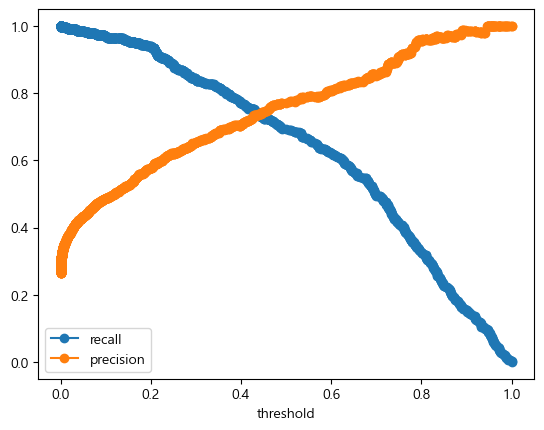

In [170]:
prc_df.plot(marker='o');

In [146]:
from sklearn.inspection import permutation_importance
result = permutation_importance(
    gs.best_estimator_, X_test, y_test, n_repeats=10, random_state=42, scoring='f1'
)

numTechTickets  : 0.224 +/- 0.014
tenure          : 0.174 +/- 0.012
TotalCharges    : 0.039 +/- 0.006
Contract_Two year : 0.026 +/- 0.006
Contract_Month-to-month : 0.021 +/- 0.005
InternetService_Fiber optic : 0.010 +/- 0.011
PaymentMethod_Electronic check : 0.004 +/- 0.004
numAdminTickets : 0.003 +/- 0.001
OnlineBackup_No : 0.002 +/- 0.003
PhoneService_No : 0.002 +/- 0.001
MultipleLines_No phone service : 0.002 +/- 0.001
PhoneService_Yes : 0.002 +/- 0.001
PaymentMethod_Mailed check : 0.001 +/- 0.002
OnlineSecurity_No : 0.001 +/- 0.005
TechSupport_No  : 0.001 +/- 0.002
DeviceProtection_No internet service : 0.001 +/- 0.001
InternetService_No : 0.001 +/- 0.001
OnlineSecurity_No internet service : 0.001 +/- 0.001
StreamingTV_No internet service : 0.001 +/- 0.001
TechSupport_No internet service : 0.001 +/- 0.001
OnlineBackup_No internet service : 0.001 +/- 0.001
StreamingMovies_No internet service : 0.001 +/- 0.001
DeviceProtection_No : 0.000 +/- 0.002
Contract_One year : 0.000 +/- 0.004


C:\Users\Playdata\AppData\Local\Temp\ipykernel_24828\1032942441.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=np.array(feature_names)[sorted_idx])


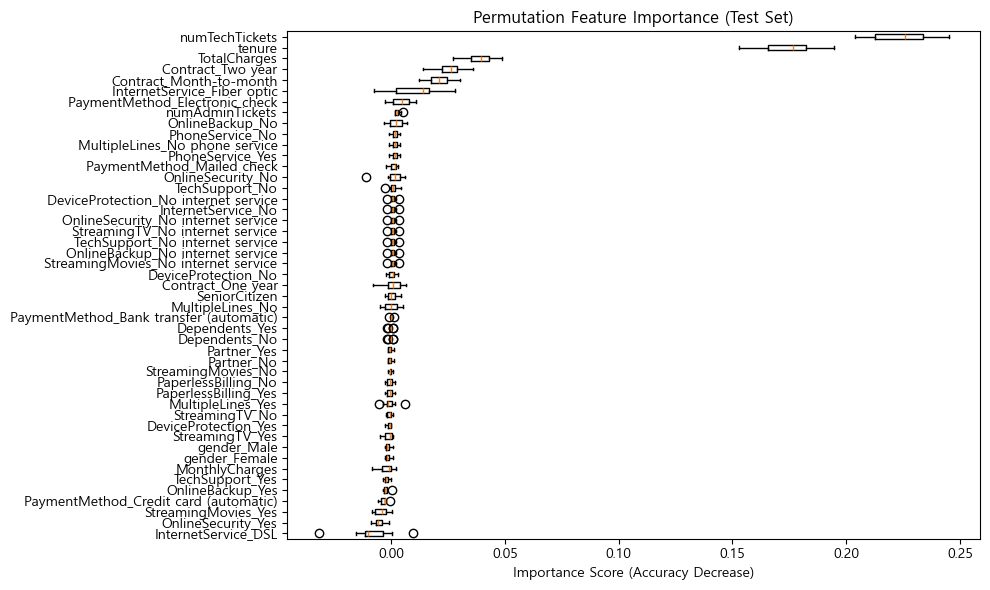

In [147]:
sorted_idx = result.importances_mean.argsort()
for i in sorted_idx[::-1]: # 내림차순 출력
    print(f"{feature_names[i]:<15} : {result.importances_mean[i]:.3f} +/- {result.importances_std[i]:.3f}")

# 시각화
plt.figure(figsize=(10, 6))
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=np.array(feature_names)[sorted_idx])
plt.title("Permutation Feature Importance (Test Set)")
plt.xlabel("Importance Score (Accuracy Decrease)")
plt.tight_layout()
plt.show()


5. XGboost

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
df = pd.read_csv(csv_path, index_col=0)

In [5]:
df2 = df.copy()
df2 = df2.drop(columns='Churn')
numeric_cols = df2.select_dtypes(include=['int64','float64']).columns
categorical_cols = df2.select_dtypes(include=['object']).columns
le = LabelEncoder()
y = le.fit_transform(df['Churn'])
ohe = OneHotEncoder(sparse_output=False)
cate_features = ohe.fit_transform(df2[categorical_cols])
X = np.concatenate(
    [cate_features, df2[numeric_cols].values], 
    axis=1
)
xgb_feature_names = np.concatenate(
    [ohe.get_feature_names_out(), numeric_cols],
    axis = 0
)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, 
    test_size=0.2,
    stratify=y_train,   # stratify=output(y값, target, label) 지정.
    random_state=42)

In [8]:
xgb_feature_names

array(['gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_No',
       'PaperlessBilling_Yes', 'Payment

In [ ]:
# 피쳐들 원핫인코딩한거를 다시 디코딩해서 'xgb_feature_names.pkl' 파일로 저장
import pickle
filename = '../src/models/ML/xgb_feature_names.pkl'
with open(filename, 'wb') as file:
    pickle.dump(xgb_feature_names, file)

 GridSearchCV 이용

In [7]:
import xgboost
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    ("xgb", XGBClassifier(n_estimators=100, learning_rate=0.01, max_depth=1, random_state=0)) # predict proba를 하기위해 probability=True가 필요
])

params = {
    "xgb__n_estimators": [300, 400, 500],
    "xgb__learning_rate": [0.03, 0.04, 0.05],
    "xgb__max_depth": [2, 3, 4, 5],
    "xgb__gamma": [0.3, 0.4, 0.5],
    "xgb__scale_pos_weight" : [1,2,3]
}

gs = GridSearchCV(
    pipeline, 
    params,
    scoring=["f1", "recall"], 
    refit="f1",
    cv=4,
    n_jobs=-1
)
gs.fit(X_train, y_train)

,estimator,"Pipeline(step...=None, ...))])"
,param_grid,"{'xgb__gamma': [0.3, 0.4, ...], 'xgb__learning_rate': [0.03, 0.04, ...], 'xgb__max_depth': [2, 3, ...], 'xgb__n_estimators': [300, 400, ...], ...}"
,scoring,"['f1', 'recall']"
,n_jobs,-1
,refit,'f1'
,cv,4
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'


In [84]:
# 평가
pred_train = gs.best_estimator_.predict(X_train)
pred_test = gs.best_estimator_.predict(X_test)

pred_train_proba = gs.best_estimator_.predict_proba(X_train)
pred_test_proba = gs.best_estimator_.predict_proba(X_test)
print(gs.best_score_, gs.best_params_)
from metrics import print_binary_classification_metrics
print("train")
print_binary_classification_metrics(y_train, pred_train, pred_train_proba[:, 1])
print("test")
print_binary_classification_metrics(y_test, pred_test, pred_test_proba[:, 1])

0.7384321977850576 {'xgb__gamma': 0.4, 'xgb__learning_rate': 0.05, 'xgb__max_depth': 3, 'xgb__n_estimators': 500, 'xgb__scale_pos_weight': 2}
train
정확도: 0.8758046194623249
F1 점수: 0.7894736842105263
재현율: 0.8773181169757489
정밀도: 0.7176196032672112
Average Precision: 0.8887944469658985
ROC-AUC Score: 0.9532110791652574
test
정확도: 0.8568994889267462
F1 점수: 0.754863813229572
재현율: 0.8308351177730193
정밀도: 0.6916221033868093
Average Precision: 0.8350062184018788
ROC-AUC Score: 0.9306898252186835


In [15]:
# 모델을 'svm_model.pkl' 파일로 저장
import pickle
filename = '../src/models/ML/xgb_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(gs.best_estimator_, file)

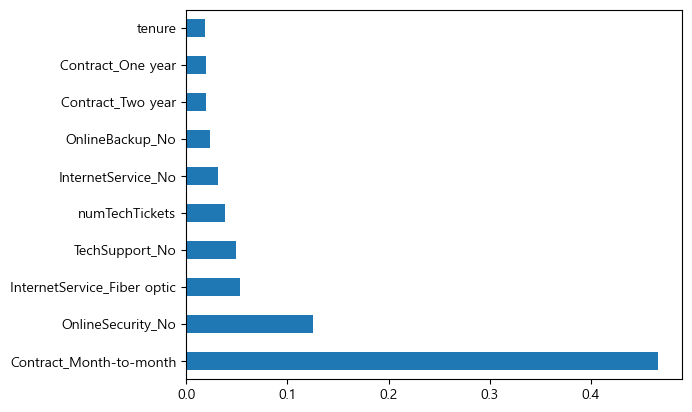

In [85]:
importances = gs.best_estimator_['xgb'].feature_importances_
fi = pd.Series(importances, index=xgb_feature_names).sort_values(ascending=False)
fi.sort_values(ascending=False)[:10].plot(kind="barh");

optuna로 최적화

In [119]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
df = pd.read_csv(csv_path, index_col=0)
df2 = df.copy()
df2 = df2.drop(columns='Churn')
numeric_cols = df2.select_dtypes(include=['int64','float64']).columns
categorical_cols = df2.select_dtypes(include=['object']).columns
le = LabelEncoder()
y = le.fit_transform(df['Churn'])
ohe = OneHotEncoder(sparse_output=False)
cate_features = ohe.fit_transform(df2[categorical_cols])
X = np.concatenate(
    [cate_features, df2[numeric_cols].values], 
    axis=1
)
xgb_feature_names = np.concatenate(
    [ohe.get_feature_names_out(), numeric_cols],
    axis = 0
)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, 
    test_size=0.2,
    stratify=y_train,   # stratify=output(y값, target, label) 지정.
    random_state=42)

In [120]:
import xgboost
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
import optuna
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay, 
                             recall_score, precision_score, f1_score, accuracy_score,
                             PrecisionRecallDisplay, average_precision_score, precision_recall_curve,
                             RocCurveDisplay, roc_auc_score, roc_curve,
                             mean_squared_error, root_mean_squared_error, r2_score)

def objective(trial):
    params = {
        # 탐색할 하이퍼파라미터 범위 정의
        "random_state": 42,
        "max_depth" : trial.suggest_int('max_depth', 2, 8), # 2부터 10까지의 정수
        "n_estimators" : trial.suggest_int('n_estimators', 50, 700), # 50부터 200까지의 정수
        "gamma": trial.suggest_float('gamma', 0.3, 0.5),
        "learning_rate": trial.suggest_float('learning_rate', 0.03, 0.07),
        "scale_pos_weight": trial.suggest_int('scale_pos_weight', 2, 5)
    }
    
    model = XGBClassifier(**params)
    model.fit(X_train, y_train)

    preds_test = model.predict(X_test)
    return f1_score(y_test, preds_test)

study = optuna.create_study(
    direction="maximize",
    study_name="xgb_opt"
)

study.optimize(objective, n_trials=100)

print("Best Params:", study.best_params)
print("Best Score:", study.best_value)

[I 2025-11-25 14:07:26,554] A new study created in memory with name: xgb_opt
[I 2025-11-25 14:07:26,620] Trial 0 finished with value: 0.7446259673258814 and parameters: {'max_depth': 4, 'n_estimators': 151, 'gamma': 0.43967157685892283, 'learning_rate': 0.03365650200058475, 'scale_pos_weight': 4}. Best is trial 0 with value: 0.7446259673258814.
[I 2025-11-25 14:07:26,772] Trial 1 finished with value: 0.7381974248927039 and parameters: {'max_depth': 4, 'n_estimators': 439, 'gamma': 0.46372984761687075, 'learning_rate': 0.030185503844062794, 'scale_pos_weight': 5}. Best is trial 0 with value: 0.7446259673258814.
[I 2025-11-25 14:07:26,853] Trial 2 finished with value: 0.7321131447587355 and parameters: {'max_depth': 3, 'n_estimators': 263, 'gamma': 0.49243766615698303, 'learning_rate': 0.0497469958776022, 'scale_pos_weight': 5}. Best is trial 0 with value: 0.7446259673258814.
[I 2025-11-25 14:07:27,031] Trial 3 finished with value: 0.7400346620450606 and parameters: {'max_depth': 3, 'n_e

Best Params: {'max_depth': 3, 'n_estimators': 652, 'gamma': 0.45679269792249805, 'learning_rate': 0.0672677019228006, 'scale_pos_weight': 3}
Best Score: 0.765296803652968


In [92]:
from optuna.importance import get_param_importances
# 하이퍼파라미터 중요도 계산
param_importances = get_param_importances(study)

print("Parameter Importances:")
for param, importance in param_importances.items():
    print(f"  {param}: {importance:.4f}")

Parameter Importances:
  n_estimators: 0.7495
  max_depth: 0.1428
  learning_rate: 0.0554
  gamma: 0.0300
  scale_pos_weight: 0.0224


train
정확도: 0.8622485207100592
F1 점수: 0.7820224719101123
재현율: 0.9313113291703836
정밀도: 0.6739832149774048
Average Precision: 0.892436985559818
ROC-AUC Score: 0.9568133719433127
val
정확도: 0.836329233680227
F1 점수: 0.7444608567208272
재현율: 0.896797153024911
정밀도: 0.6363636363636364
Average Precision: 0.8409991334766103
ROC-AUC Score: 0.9309924973401328
test
정확도: 0.8540601930721181
F1 점수: 0.765296803652968
재현율: 0.8972162740899358
정밀도: 0.6671974522292994
Average Precision: 0.8292267171344867
ROC-AUC Score: 0.929282407024349


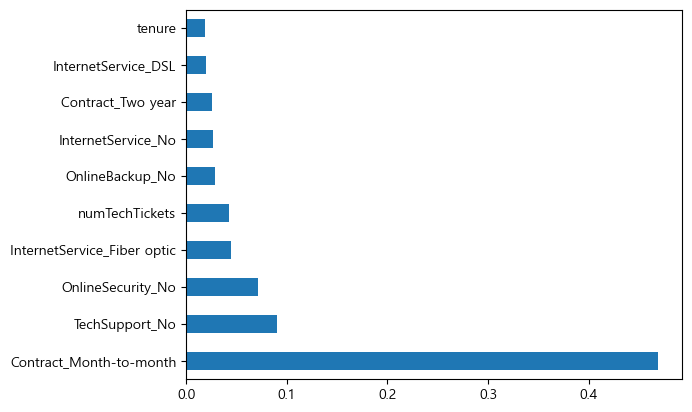

In [121]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import xgboost
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

df = pd.read_csv(csv_path, index_col=0)
df2 = df.copy()
df2 = df2.drop(columns='Churn')
numeric_cols = df2.select_dtypes(include=['int64','float64']).columns
categorical_cols = df2.select_dtypes(include=['object']).columns
le = LabelEncoder()
y = le.fit_transform(df['Churn'])
ohe = OneHotEncoder(sparse_output=False)
cate_features = ohe.fit_transform(df2[categorical_cols])
X = np.concatenate(
    [cate_features, df2[numeric_cols].values], 
    axis=1
)
xgb_feature_names = np.concatenate(
    [ohe.get_feature_names_out(), numeric_cols],
    axis = 0
)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, 
    test_size=0.2,
    stratify=y_train,   # stratify=output(y값, target, label) 지정.
    random_state=42)
model = XGBClassifier(n_estimators=652, learning_rate=0.0672677019228006, scale_pos_weight=3, gamma=0.45679269792249805, max_depth=3, random_state=42)
model.fit(X_train, y_train)
pred_train = model.predict(X_train)
pred_val = model.predict(X_val)
pred_test = model.predict(X_test)

pred_train_proba = model.predict_proba(X_train)
pred_val_proba = model.predict_proba(X_val)
pred_test_proba = model.predict_proba(X_test)

from metrics import print_binary_classification_metrics
print("train")
print_binary_classification_metrics(y_train, pred_train, pred_train_proba[:, 1])
print("val")
print_binary_classification_metrics(y_val, pred_val, pred_val_proba[:, 1])
print("test")
print_binary_classification_metrics(y_test, pred_test, pred_test_proba[:, 1])
importances = model.feature_importances_
fi = pd.Series(importances, index=xgb_feature_names).sort_values(ascending=False)
fi.sort_values(ascending=False)[:10].plot(kind="barh");